In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Mechanics Lab 3 -- Projectile Motion with Air Resistance

This lab builds upon the numerical integration code your wrote in the previous lab. This time, though, you will include drag in your calculations of projectile motion.

*** If you have not yet completed Lab 2, please do so now.***

## Objectives
In this lab, you will 

* include linear and quadratic drag in your equations of motion for a projectile,
* validate your code by comparing your numerical solution to the analytic solution in several special cases,and
* calculate the mechanical energy loss due to drag.

## Improved Euler Numerical Integration

#### Exercise 3.1

Start by copying your code from the previous lab to solve projectile motion without air resistance using the improved Euler method into the cell below. Make sure that it still produces reasonable results.

1.6007167032101177e-13
4.167222122930525e-13


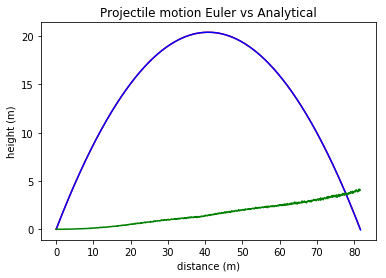

In [2]:


# Exercise 3.1 Projectile motion, improved Euler
# No damping, numerical integration 

# Here we define the variables that will be used throughout the integration
g = 9.8 #the acceleration due to gravity.  By declaring it here it will be available anywhere in the rest of the notebook
m = 1 # the mass of the projectile

# Create 
tstart = 0 #starting time
tend = 15 #ending time
N = 3000 # #steps
h = (tend-tstart)/N #  h is the time step, deltat
tpts = arange(tstart,tend,h) # an array of evenly spaced time points at which to create solutions

# Initialize x and v.  For a complete solution to the differential equations we need to specify the starting
#values of x, vx, y and vy
x0 = 0 #initial x position
y0 = 0 #initial y position
vx0 = 20 #initial x-component of the velocity
vy0 = 20 #initial y-component of the velocity
rinit = array([x0,vx0,y0,vy0],float) #this array contains the initial values of x, vx, y, vy, in order
# Note that the list 0,20,0,20 is enclosed in square brackets

def deriv(r,t):
    x = r[0]  #first, extract the variables from the r-list
    vx = r[1]
    y = r[2]
    vy = r[3]
    dxdt = vx #now create the derivatives.  Note:  by definition dxdt = vx
    dvxdt = 0
    dydt = vy
    dvydt = - g
    return array([dxdt, dvxdt, dydt, dvydt],float) #we need to specify the output of this function

xpts = []  #this is an empty list that will hold x solutions
vxpts = []  #this will hold vx solutions
ypts = []  #y
vypts = [] #vy

r = rinit.copy()  #make a *copy* of rinit.  This leaves rinit unchanged, but allows r to take on different values

#The engine:  initialize values, then step through with simple Euler method (uses a 1st-order Taylor series)
for t in tpts:  #this *for* loop sequentially takes on all the elements of tpts, first to last
    xpts.append(r[0])  #extend the list by tacking the latest x on to the end of it
    vxpts.append(r[1]) #starting from r which is originally a copy of rinit
    ypts.append(r[2])
    vypts.append(r[3])
    k1 = (h/2)*deriv(r,t)
    r += h*deriv(r+k1,t)

    if (t > 0.0)&(r[2]<=0.0):  # a test to see when to cut off the solution
                               # (the & symbol indicates a logical AND:  both conditions need to be true)
        tmax = t               # by noting when the projectile hits the ground
      
        range = r[0]           #store the last x position in the variable named range
        break  #quit out of the loop


def kinematic_2d(x0,y0,vx0,vy0,a,t):
    y = 0.5*a*t**2 + vy0*t + x0
    x = vx0*t
    return (x,y)

analytical_x = []
analytical_y = []
for t in tpts:
    (x,y) = kinematic_2d(0,0,20,20,-9.8,t)
    analytical_x.append(x)
    analytical_y.append(y)
    
    if t>0.0 and y<0.0:
        break
    
t_array = array(tpts,float)
euler_x = array(xpts,float)
euler_y = array(ypts,float)
analytical_x = array(analytical_x,float)
analytical_y = array(analytical_y,float)
residual = euler_y - analytical_y[:817]
figure()  
plot(euler_x,euler_y,color='red')
plot(analytical_x,analytical_y,color='blue')
plot(euler_x,1e13*residual,color='green')
title("Projectile motion Euler vs Analytical")            
xlabel("distance (m)")
ylabel("height (m)")

print(np.average(residual))
print(np.max(residual))

## Projectile Motion with Drag

In order to include drag force, you will need to adjust your deriv function to include velocity-dependent damping coefficients of the form:
    
$ \vec{F}_{drag} = -b \vec{v} - c v^2 \hat{v}$

## Linear Drag

#### Exercise 3.2

You will start with the simpler and analytically-solvable case of just linear drag (i.e., c = 0). Redo your Improved Euler projectile problem with the same initial conditions* as before to show the trajectory and find the range (over level ground) for b = 0.05, and c = 0.0.  Assume that the projectile has mass m = 0.5 kg.

##### Drag-restricted range (for b =  0.05, c = 0.0, m = 0.5 kg) = 

\* tStart = 0.0s, tEnd = 15.0s, nSteps = 3000 , $ \vec{r}(0)=(0,0)$m and $\vec{v} (0) = (20,20)$m/s.

*(I get approximately 64 m.  Show your result to 4 significant figures.)*

How is the range and height of the projectile affected by the inclusion of linear drag? Explain ***here***. 

The max height was decreased by 2.5 m and the range was decreased by about 15 m.

63.77


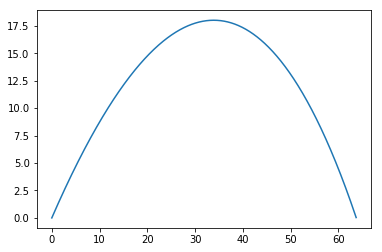

In [3]:
# <Exercise 3.2 Solution for projectile motion with linear drag, using improved Euler.>

# Here we define the variables that will be used throughout the integration
g = 9.8 #the acceleration due to gravity.  By declaring it here it will be available anywhere in the rest of the notebook
m = 0.5 # the mass of the projectile
b = 0.05 # drag constant
c = 0.0

# Create 
tstart = 0 #starting time
tend = 15 #ending time
N = 3000 # #steps
h = (tend-tstart)/N #  h is the time step, deltat
tpts = arange(tstart,tend,h) # an array of evenly spaced time points at which to create solutions

# Initialize x and v.  For a complete solution to the differential equations we need to specify the starting
#values of x, vx, y and vy
x0 = 0 #initial x position
y0 = 0 #initial y position
vx0 = 20 #initial x-component of the velocity
vy0 = 20 #initial y-component of the velocity
rinit = array([x0,vx0,y0,vy0],float) #this array contains the initial values of x, vx, y, vy, in order
# Note that the list 0,20,0,20 is enclosed in square brackets

def deriv(r,t):
    x = r[0]  #first, extract the variables from the r-list
    vx = r[1]
    y = r[2]
    vy = r[3]
    v = sqrt(vx*vx+vy*vy) # define v as the magnitude of the v vector with components vx and vy
    dxdt = vx #now create the derivatives.  Note:  by definition dxdt = vx
    dvxdt = 0 - b*vx/m - c*v*vx/m # quadratic drag formula from Taylor p. 62
    dydt = vy
    dvydt = - g - b*vy/m - c*v*vy/m
    return array([dxdt, dvxdt, dydt, dvydt],float) #we need to specify the output of this function

xpts = []  #this is an empty list that will hold x solutions
vxpts = []  #this will hold vx solutions
ypts = []  #y
vypts = [] #vy

r = rinit.copy()  #make a *copy* of rinit.  This leaves rinit unchanged, but allows r to take on different values

#The engine:  initialize values, then step through with simple Euler method (uses a 1st-order Taylor series)
for t in tpts:  #this *for* loop sequentially takes on all the elements of tpts, first to last
    xpts.append(r[0])  #extend the list by tacking the latest x on to the end of it
    vxpts.append(r[1]) #starting from r which is originally a copy of rinit
    ypts.append(r[2])
    vypts.append(r[3])
    k1 = (h/2)*deriv(r,t)
    r += h*deriv(r+k1,t)

    if (t > 0.0)&(r[2]<=0.0):  # a test to see when to cut off the solution
                               # (the & symbol indicates a logical AND:  both conditions need to be true)
        tmax = t               # by noting when the projectile hits the ground
      
        range = r[0]           #store the last x position in the variable named range
        break  #quit out of the loop
        
# make our graph
plot(xpts, ypts)

# print range
print("%.4g" % range)

## Quadratic Drag

### One-dimensional motion

Next, you will test your quadratic-drag code with two different sets of initial conditions. As you do this, try to determine the minimum amount of code you will need to copy into a new cell. For instance, since your deriv function will not be changing, there is no need to copy it.

#### Exercise 3.3

First you will model a rock dropped vertically from a cliff. Modify your deriv function to include quadratic but not linear drag. Let $b$ = 0 and $c$ = 0.002; keep $m$ = 0.5 kg. Since it is only possible to find an analytic solution with quadratic drag for 1-dimensional motion (why is that?), start by using the following initial conditions: $ \vec{r}(0)=(0, 400)$m and $\vec{v} (0) = (0,0)$m/s. Since the motion will be in one dimension, plot $y$ vs. $t$ rather than vs. $x$.

Text(0.5, 0, 'Time (s)')

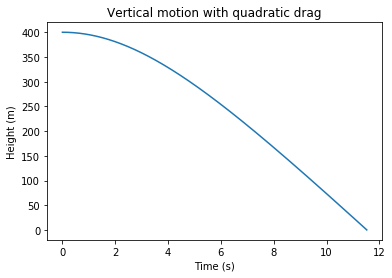

In [4]:
# <Exercise 3.3 Solution for projectile motion with quadratic drag, using improved Euler.>
b = 0.0
c = 0.002

# Create 
tstart = 0 #starting time
tend = 15 #ending time
N = 3000 # #steps
h = (tend-tstart)/N #  h is the time step, deltat
tpts = arange(tstart,tend,h) # an array of evenly spaced time points at which to create solutions

# Initialize x and v.  For a complete solution to the differential equations we need to specify the starting
#values of x, vx, y and vy
x0 = 0 #initial x position
y0 = 400 #initial y position
vx0 = 0 #initial x-component of the velocity
vy0 = 0 #initial y-component of the velocity
rinit = array([x0,vx0,y0,vy0],float) #this array contains the initial values of x, vx, y, vy, in order
# Note that the list 0,20,0,20 is enclosed in square brackets

xpts,vxpts,ypts,vypts = [],[],[],[]  #this are an empty lists that will hold solutions

r = rinit.copy()  #make a *copy* of rinit.  This leaves rinit unchanged, but allows r to take on different values
i = 0 # counter to limit tpts list to match ypts list

#The engine:  initialize values, then step through with simple Euler method (uses a 1st-order Taylor series)
for t in tpts:  #this *for* loop sequentially takes on all the elements of tpts, first to last
    xpts.append(r[0])  #extend the list by tacking the latest x on to the end of it
    vxpts.append(r[1]) #starting from r which is originally a copy of rinit
    ypts.append(r[2])
    vypts.append(r[3])
    k1 = (h/2)*deriv(r,t)
    r += h*deriv(r+k1,t)
    i += 1
    if (t > 0.0)&(r[2]<=0.0):  # a test to see when to cut off the solution
                               # (the & symbol indicates a logical AND:  both conditions need to be true)
        tmax = t               # by noting when the projectile hits the ground
      
        range = r[0]           #store the last x position in the variable named range
        break  #quit out of the loop
        
# make our graph
plot(tpts[0:i],ypts)
title("Vertical motion with quadratic drag")
ylabel("Height (m)")
xlabel("Time (s)")


#### Exercise 3.4

What terminal velocity would you expect the rock to reach?

$$|v| = \sqrt{\frac{mg}{c}}$$
$$|v| = \sqrt{\frac{.5*9.8}{.002}}$$
$$|v| = 50~{m/s}$$


##### Expected terminal velocity:

Plot $v_y$ vs. $t$ and estimate the terminal velocity. Are your answers consistent with each other? Explain ***here***. 

Yes, as the $v_y$ plot shows the velocity settling out to $-50$ m/s. 

Text(0.5, 0, 'Time (s)')

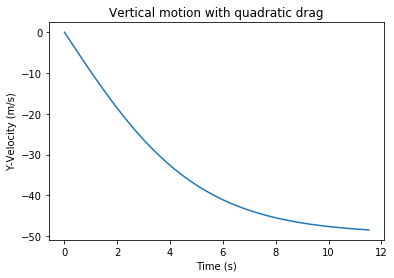

In [5]:
# <Exercise 3.4 v vs. t for projectile motion with quadratic drag, using improved Euler.>

plot(tpts[0:i],vypts)
title("Vertical motion with quadratic drag")
ylabel("Y-Velocity (m/s)")
xlabel("Time (s)")


#### Exercise 3.5

This is the situation where the rock is thrown vertically up into the air. Calculate and plot $y$ vs. $t$ and $v_y$ vs. $t$ for the initial conditions: $ \vec{r}(0)=(0,0)$m and $\vec{v} (0) = (0,28)$m/s. Find how long the rock remains in the air. Keep all other parameters the same as in exercise 3.3. 

##### Time in air (for b =  0, c = 0.002, m = 0.5 kg) = 

*I get approximately 5 s.  Show your result to 3 significant figures.*

5.32


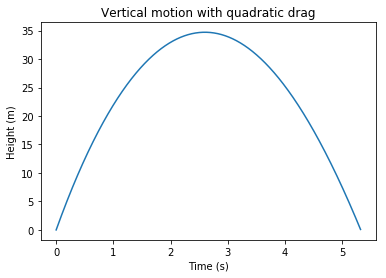

In [6]:
# <Exercise 3.5, projectile motion with quadratic drag, using improved Euler.>
b = 0.0
c = 0.002

# Create 
tstart = 0 #starting time
tend = 15 #ending time
N = 3000 # #steps
h = (tend-tstart)/N #  h is the time step, deltat
tpts = arange(tstart,tend,h) # an array of evenly spaced time points at which to create solutions

# Initialize x and v.  For a complete solution to the differential equations we need to specify the starting
#values of x, vx, y and vy
x0 = 0 #initial x position
y0 = 0 #initial y position
vx0 = 0 #initial x-component of the velocity
vy0 = 28 #initial y-component of the velocity
rinit = array([x0,vx0,y0,vy0],float) #this array contains the initial values of x, vx, y, vy, in order
# Note that the list 0,20,0,20 is enclosed in square brackets

xpts,vxpts,ypts,vypts = [],[],[],[]  #this are an empty lists that will hold solutions

r = rinit.copy()  #make a *copy* of rinit.  This leaves rinit unchanged, but allows r to take on different values
i = 0 # counter to limit tpts list to match ypts list

#The engine:  initialize values, then step through with simple Euler method (uses a 1st-order Taylor series)
for t in tpts:  #this *for* loop sequentially takes on all the elements of tpts, first to last
    xpts.append(r[0])  #extend the list by tacking the latest x on to the end of it
    vxpts.append(r[1]) #starting from r which is originally a copy of rinit
    ypts.append(r[2])
    vypts.append(r[3])
    k1 = (h/2)*deriv(r,t)
    r += h*deriv(r+k1,t)
    i += 1
    if (t > 0.0)&(r[2]<=0.0):  # a test to see when to cut off the solution
                               # (the & symbol indicates a logical AND:  both conditions need to be true)
        tmax = t               # by noting when the projectile hits the ground
      
        range = r[0]           #store the last x position in the variable named range
        break  #quit out of the loop
        
# make our graph
plot(tpts[0:i],ypts)
#plot(xpts,ypts)
title("Vertical motion with quadratic drag")
ylabel("Height (m)")
xlabel("Time (s)")
print("%.3g" % tmax)


#### Exercise 3.6

Drag forces are nonconservative forces so work done by them results in a loss of the mechanical energy of the system. To see this, first find the amount of mechanical energy lost during the rock's trajectory and then graph the kinetic energy, potential energy and total energy vs. time (all on one plot).

##### Mechanical energy loss = 

*(I get approximately 48 J.  Show your result to 3 significant figures.)*

Notice that at one point in the trajectory, the rate of energy loss goes to zero. Explain ***here*** why that makes sense.

Because there is work done on the rock by the drag force, eventually velocity goes to 0. So, the kinetic energy also goes to 0. At the top of the trajectory where velocity = 0, there is no drag acting on the rock. Therefore, the rate of energy loss is 0.

Net change in energy -47.42 J


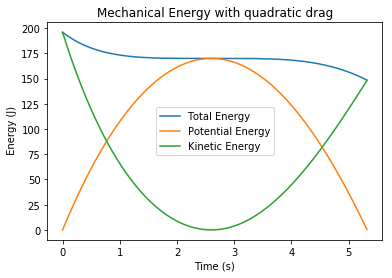

In [7]:
# <Exercise 3.6, mechanical energy loss.>

# <Exercise 3.5, projectile motion with quadratic drag, using improved Euler.>
b = 0.0
c = 0.002

# Create 
tstart = 0 #starting time
tend = 15 #ending time
N = 3000 # #steps
h = (tend-tstart)/N #  h is the time step, deltat
tpts = arange(tstart,tend,h) # an array of evenly spaced time points at which to create solutions

# Initialize x and v.  For a complete solution to the differential equations we need to specify the starting
#values of x, vx, y and vy
x0 = 0 #initial x position
y0 = 0 #initial y position
vx0 = 0 #initial x-component of the velocity
vy0 = 28 #initial y-component of the velocity
rinit = array([x0,vx0,y0,vy0],float) #this array contains the initial values of x, vx, y, vy, in order
# Note that the list 0,20,0,20 is enclosed in square brackets

xpts,vxpts,ypts,vypts = [],[],[],[]  #this are an empty lists that will hold solutions
KE, PE, TE = [],[],[]
r = rinit.copy()  #make a *copy* of rinit.  This leaves rinit unchanged, but allows r to take on different values
i = 0 # counter to limit tpts list to match ypts list

#The engine:  initialize values, then step through with simple Euler method (uses a 1st-order Taylor series)
for t in tpts:  #this *for* loop sequentially takes on all the elements of tpts, first to last
    xpts.append(r[0])  #extend the list by tacking the latest x on to the end of it
    vxpts.append(r[1]) #starting from r which is originally a copy of rinit
    ypts.append(r[2])
    vypts.append(r[3])
    v = sqrt(r[1]*r[1]+r[3]*r[3])
    KE_current = 0.5*m*v*v
    PE_current = m*g*r[2]
    KE.append(KE_current)
    PE.append(PE_current)
    TE.append(KE_current+PE_current)
    
    k1 = (h/2)*deriv(r,t)
    r += h*deriv(r+k1,t)
    i += 1
    if (t > 0.0)&(r[2]<=0.0):  # a test to see when to cut off the solution
                               # (the & symbol indicates a logical AND:  both conditions need to be true)
        tmax = t               # by noting when the projectile hits the ground
      
        range = r[0]           #store the last x position in the variable named range
        break  #quit out of the loop
        
# make our graph
plot(tpts[0:i],TE,label='Total Energy')
plot(tpts[0:i],PE,label='Potential Energy')
plot(tpts[0:i],KE,label='Kinetic Energy')
legend()
title("Mechanical Energy with quadratic drag")
ylabel(" Energy (J)")
xlabel("Time (s)")
print("Net change in energy %.4g J" % (min(TE)-max(TE)))


#### Exercise 3.7

Since work done on a system is equal to the change in energy, it is possible to equate the change in mechanical energy of the rock to the work done by the drag force. For this exercise, estimate the work done by the drag force across each time-step and sum to find the total work done. Essentially, you will be finding

$$
W = \int \vec F \cdot d\vec r
$$

using the rectangle method for estimating an integral. Verify that the total work you calculate is close to the change in energy.

*Hint 1:* The function cumsum() will calculate the sum over an array. This is cleaner and easier than writing a loop to sum over the elements, as you did in the previous lab. https://docs.scipy.org/doc/numpy/reference/generated/numpy.cumsum.html

*Hint 2:* You'll need to find the displacement across each time-step. One way to do this is to subtract y[0:-2] from y[1:-1]. Can you see why? Remember that referencing element -1, refers to the last element in the array.

*Hint 3:* Be aware of the negative/positive signs of your displacement.

Total work done after 5.32 seconds is -47.25 J


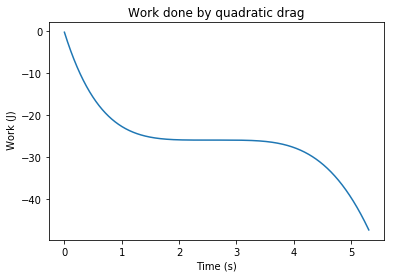

In [8]:
# <Exercise 3.7, work done by drag force.>
b = 0.0
c = 0.002

# Create 
tstart = 0 #starting time
tend = 15 #ending time
N = 3000 # #steps
h = (tend-tstart)/N #  h is the time step, deltat
tpts = arange(tstart,tend,h) # an array of evenly spaced time points at which to create solutions

# Initialize x and v.  For a complete solution to the differential equations we need to specify the starting
#values of x, vx, y and vy
x0 = 0 #initial x position
y0 = 0 #initial y position
vx0 = 0 #initial x-component of the velocity
vy0 = 28 #initial y-component of the velocity
rinit = array([x0,vx0,y0,vy0],float) #this array contains the initial values of x, vx, y, vy, in order
# Note that the list 0,20,0,20 is enclosed in square brackets

xpts,vxpts,ypts,vypts = [],[],[],[]  #this are an empty lists that will hold solutions
KE, PE, TE = [],[],[]
r = rinit.copy()  #make a *copy* of rinit.  This leaves rinit unchanged, but allows r to take on different values
i = 0 # counter to limit tpts list to match ypts list

#The engine:  initialize values, then step through with simple Euler method (uses a 1st-order Taylor series)
for t in tpts:  #this *for* loop sequentially takes on all the elements of tpts, first to last
    xpts.append(r[0])  #extend the list by tacking the latest x on to the end of it
    vxpts.append(r[1]) #starting from r which is originally a copy of rinit
    ypts.append(r[2])
    vypts.append(r[3])
    v = sqrt(r[1]*r[1]+r[3]*r[3])
    KE_current = 0.5*m*v*v
    PE_current = m*g*r[2]
    KE.append(KE_current)
    PE.append(PE_current)
    TE.append(KE_current+PE_current)
    
    k1 = (h/2)*deriv(r,t)
    r += h*deriv(r+k1,t)
    i += 1
    if (t > 0.0)&(r[2]<=0.0):  # a test to see when to cut off the solution
                               # (the & symbol indicates a logical AND:  both conditions need to be true)
        tmax = t               # by noting when the projectile hits the ground
      
        range = r[0]           #store the last x position in the variable named range
        break  #quit out of the loop

        
dr = np.array(ypts[0:-2])-np.array(ypts[1:-1])
dr = np.array(dr)
vx = np.array(vxpts[0:-2])
vy = np.array(vypts[1:-1])
v = np.sqrt(vx*vx+vy*vy)

dragforce = -b*vy - c*v*vy

work = -dragforce*dr
# work done on the system is negative since dr and F_drag are antiparallel
work_sum = np.cumsum(work)
        
# make our graph

plot(tpts[0:i-2],work_sum,label="Work")
title("Work done by quadratic drag")
ylabel(" Work (J)")
xlabel("Time (s)")
print("Total work done after %.4g seconds is %.4g J" % (tmax,min(work_sum)))


## Linear and Quadratic Drag

Now for 2-dimensional motion with both linear and quadratic drag. *This is a trajectory that cannot be found analytically and so must be calculated numercially!* 

#### Exercise 3.8

Looking at Exercise 2.1 in Taylor (p. 45), match the coefficients for a baseball of diameter $d$ =7 cm, and mass $m$ = 145 g and again plot the trajectory and find the range. In order to see clearly the effect of the drag, include the analytic solution for the case of zero-drag on your plot of the trajectory.

*Coding style tip:* rather than hard-coding your values for the drag-coefficients into your deriv function, try passing them as variables. This will make your deriv function more flexible.

##### Drag-restricted range for the baseball = 

*(I get approximately 55 m.  Show your result to 4 significant figures.)*

The baseball's range with drag is 54.6 m
The baseball's range with no drag is 81.7 m


Text(0.5, 0, 'Distance (m)')

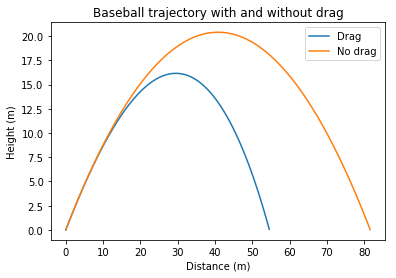

In [23]:
# <Exercise 3.8 Solution for baseball from Taylor, p. 45. Projectile motion, improved Euler, with drag.>
m = .145
gamma = 0.25
beta = 1.6e-4
D = 0.07


# Create 
tstart = 0 #starting time
tend = 15 #ending time
N = 3000 # #steps
h = (tend-tstart)/N #  h is the time step, deltat
tpts = arange(tstart,tend,h) # an array of evenly spaced time points at which to create solutions


def deriv(r,t,b_coeff,c_coeff):
    x = r[0]  #first, extract the variables from the r-list
    vx = r[1]
    y = r[2]
    vy = r[3]
    v = sqrt(vx*vx+vy*vy) # define v as the magnitude of the v vector with components vx and vy
    dxdt = vx #now create the derivatives.  Note:  by definition dxdt = vx
    dvxdt = 0 - b_coeff*vx/m - c_coeff*v*vx/m # quadratic drag formula from Taylor p. 62
    dydt = vy
    dvydt = - g - b_coeff*vy/m - c_coeff*v*vy/m
    return array([dxdt, dvxdt, dydt, dvydt],float) #we need to specify the output of this function

def euler(rinit,tpts,b_coeff,c_coeff):
    i = 0
    r = rinit.copy()
    xpts,vxpts,ypts,vypts = [],[],[],[]  #this are an empty lists that will hold solutions
    for t in tpts:
        xpts.append(r[0])  #extend the list by tacking the latest x on to the end of it
        vxpts.append(r[1]) #starting from r which is originally a copy of rinit
        ypts.append(r[2])
        vypts.append(r[3])

        k1 = (h/2)*deriv(r,t,b_coeff,c_coeff)
        r += h*deriv(r+k1,t,b_coeff,c_coeff)

        i += 1
        if (t > 0.0)&(r[2]<=0.0):  # a test to see when to cut off the solution
                                   # (the & symbol indicates a logical AND:  both conditions need to be true)
            tmax = t               # by noting when the projectile hits the ground

            range = r[0]           #store the last x position in the variable named range
            break  #quit out of the loop
    
    return xpts,ypts,range

rinit = np.array([0,20,0,20],dtype=float)

xpts_drag,ypts_drag,range_drag = euler(rinit,tpts, beta*D,  gamma*D*D)

xpts_nodrag,ypts_nodrag,range_nodrag = euler(rinit,tpts,0.0,0.0)



print("The baseball's range with drag is %.4g m" % range_drag)
print("The baseball's range with no drag is %.4g m" % range_nodrag)
plot(xpts_drag,ypts_drag,label="Drag")
plot(xpts_nodrag,ypts_nodrag,label="No drag")
legend()
title("Baseball trajectory with and without drag")
ylabel("Height (m)")
xlabel("Distance (m)")


#### Exercise 3.9

Try alternately setting both $b$ and $c$ to zero. ***Which has a greater effect on the trajectory of the baseball: the linear or quadratic term?***

The quadratic drag has a signficantly larger impact on the drag---it almost singlehandedly describes the drag.

The baseball's range with drag is 54.6 m
The baseball's range with no drag is 81.7 m
The baseball's range with just linear drag is 81.69 m
The baseball's range with just quadratic drag is 54.61 m


Text(0.5, 0, 'Distance (m)')

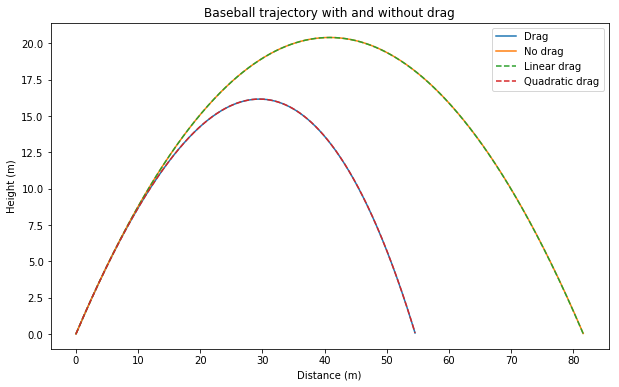

In [35]:
xpts_quad,ypts_quad,range_quad = euler(rinit,tpts, 0.0,  gamma*D*D) # just quadratic
xpts_lin,ypts_lin,range_lin = euler(rinit,tpts, beta*D,  0.0) # just linear
xpts_nodrag,ypts_nodrag,range_nodrag = euler(rinit,tpts,0.0,0.0) # no drag
xpts_drag,ypts_drag,range_drag = euler(rinit,tpts, beta*D,  gamma*D*D) # all the drag

print("The baseball's range with drag is %.4g m" % range_drag)
print("The baseball's range with no drag is %.4g m" % range_nodrag)
print("The baseball's range with just linear drag is %.4g m" % range_lin)
print("The baseball's range with just quadratic drag is %.4g m" % range_quad)
figure(figsize=(10,6))
plot(xpts_drag,ypts_drag,label="Drag")
plot(xpts_nodrag,ypts_nodrag,label="No drag")
plot(xpts_lin,ypts_lin,linestyle='dashed',label="Linear drag")
plot(xpts_quad,ypts_quad,linestyle='dashed',label="Quadratic drag")
legend()
title("Baseball trajectory with and without drag")
ylabel("Height (m)")
xlabel("Distance (m)")

## Check-out
#### Exercise 3.10

Briefly summarize in the cell below the ideas of today's lab.

We started with our improved Euler numerical integration and then moved into finding the linear and quadratic drag for kinematics problems. Then we looked at energy and its relation to velocity, and saw how energy is not conserved with the presence of a nonconservative force (e.g. the drag force). Finally, we wrapped it up with a comparison of quadratic and linear drag on a high-velocity projectile such as a baseball, and found the quadratic term to be significiantly more important while the linear term was trivial.

It really just dragged on ;)

## Challenge Problems

Repeat the work-energy analysis you did in 3.6 and 3.7 for the baseball. Note that you'll have to calculate the change in position for 2-dimensional motion and that you'll have to include both forms of drag. 